In [33]:
import os
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

from tensorboard.backend.event_processing import event_accumulator
from collections import defaultdict
import seaborn as sns

In [7]:
experiments = {
 'dqn_sharing': [],
 'dqn_prio_sharing': [],
 'dqn_prio_focus_sharing': [],
 'dqn_focus_sharing': [],
 'dqn': [],
 'dqn_prio': []
}

# list experiments
root = "/Users/lucasosouza/Documents/fasterRLdata/runs/"
for folder, files in experiments.items():
    path = os.path.join(root, folder)
    if folder == 'dqn' or folder == 'dqn_prio':
        for i in range(40):
            trial_name = 'agent-trial' + str(i)
            trial_path = os.path.join(path, trial_name)
            # get the last file and append to files
            res = list(sorted(os.listdir(trial_path)))[-1]
            files.append(os.path.join(trial_path, res))
    else:            
        for i in range(20):
            trial_name = 'agent0-trial' + str(i)
            trial_path = os.path.join(path, trial_name)
            # get the last file and append to files
            res = list(sorted(os.listdir(trial_path)))[-1]
            files.append(os.path.join(trial_path, res))
        for i in range(20):
            trial_name = 'agent1-trial' + str(i)
            trial_path = os.path.join(path, trial_name)
            # get the last file and append to files
            res = list(sorted(os.listdir(trial_path)))[-1]
            files.append(os.path.join(trial_path, res))


In [8]:
experiments['dqn']

['/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial0/events.out.tfevents.1546138413.Lucass-MacBook-Pro-2.local',
 '/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial1/events.out.tfevents.1546138533.Lucass-MacBook-Pro-2.local',
 '/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial2/events.out.tfevents.1546138683.Lucass-MacBook-Pro-2.local',
 '/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial3/events.out.tfevents.1546138745.Lucass-MacBook-Pro-2.local',
 '/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial4/events.out.tfevents.1546138937.Lucass-MacBook-Pro-2.local',
 '/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial5/events.out.tfevents.1546139079.Lucass-MacBook-Pro-2.local',
 '/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial6/events.out.tfevents.1546139258.Lucass-MacBook-Pro-2.local',
 '/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial7/events.out.tfevents.1546139350.Lucass-MacBook-Pro-2.

In [14]:
tb ='/Users/lucasosouza/Documents/fasterRLdata/runs/dqn/agent-trial39/events.out.tfevents.1546141902.Lucass-MacBook-Pro-2.local'
ea = event_accumulator.EventAccumulator(tb)
ea.Reload()
metric = 'reward/episode'
data = ea.Scalars(metric)


In [20]:
data[0].step, data[0].value

(1, 12.0)

In [32]:
# don't run again for now
# metric = 'reward/episode'
# data = {k:defaultdict(list) for k in experiments.keys()}
# for exp, runs in experiments.items():
#     for run in runs:
#         ea = event_accumulator.EventAccumulator(run)
#         ea.Reload()
#         events = ea.Scalars(metric)
#         for e in events:
#             data[exp][e.step].append(e.value)
            

In [ ]:
# check if it is really an integer
# and check if sorting is going to work out

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.75})

In [52]:
experiments_labels = {
    'dqn_sharing': 'DQN + Naive ES',
    'dqn_prio_sharing': 'DQN-PR + Prioritized ES', 
    'dqn_prio_focus_sharing': 'DQN-PR + Prioritized Focused ES', 
    'dqn_focus_sharing': 'DQN + Focused ES', 
    'dqn': 'DQN',
    'dqn_prio': 'DQN-PR',
}

In [61]:
data.keys()

dict_keys(['dqn_sharing', 'dqn_prio_sharing', 'dqn_prio_focus_sharing', 'dqn_focus_sharing', 'dqn', 'dqn_prio'])

In [95]:
# variation, with dataframe, to try and use seaborn plot 
# this should be a better way of doing this
# but we have yet to see how it works
# it is taking a long time to open all those runs
long =[]
experiment_keys = ['dqn', 'dqn_sharing', 'dqn_focus_sharing', 'dqn_prio', 'dqn_prio_sharing', 'dqn_prio_focus_sharing']
for exp in experiment_keys:
    steps = data[exp]
    for step, values in sorted(steps.items(), key=lambda x:x[0]):
        for value in values:
            long.append(
                {
                    'algorithm': experiments_labels[exp],
                    'episode': int(step),
                    'reward': value
                }
            )

df = pd.DataFrame.from_dict(long)

In [96]:
df.tail()

,algorithm,episode,reward
62244,DQN-PR + Prioritized Focused ES,456,200.0
62245,DQN-PR + Prioritized Focused ES,457,200.0
62246,DQN-PR + Prioritized Focused ES,458,200.0
62247,DQN-PR + Prioritized Focused ES,459,200.0
62248,DQN-PR + Prioritized Focused ES,460,200.0


In [101]:
# filter data
regular = ['DQN','DQN + Naive ES','DQN + Focused ES']
prio = ['DQN-PR','DQN-PR + Prioritized ES', 'DQN-PR + Prioritized Focused ES']
best = ['DQN + Focused ES', 'DQN-PR + Prioritized Focused ES']


/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


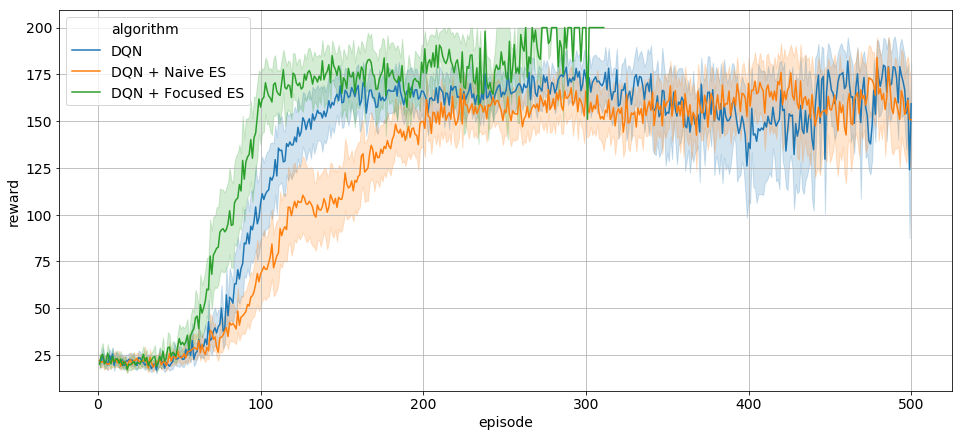

In [103]:
df_plot = df[df['episode'] <= 500] # change later with more data
df_plot = df_plot[df_plot['algorithm'].isin(regular)]

plt.figure(figsize=(16,7))
sns.lineplot(x='episode', y='reward', hue='algorithm', data=df_plot, legend="brief")
plt.savefig('rewards-regulardqn.png', dpi=200, bbox_inches='tight')

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


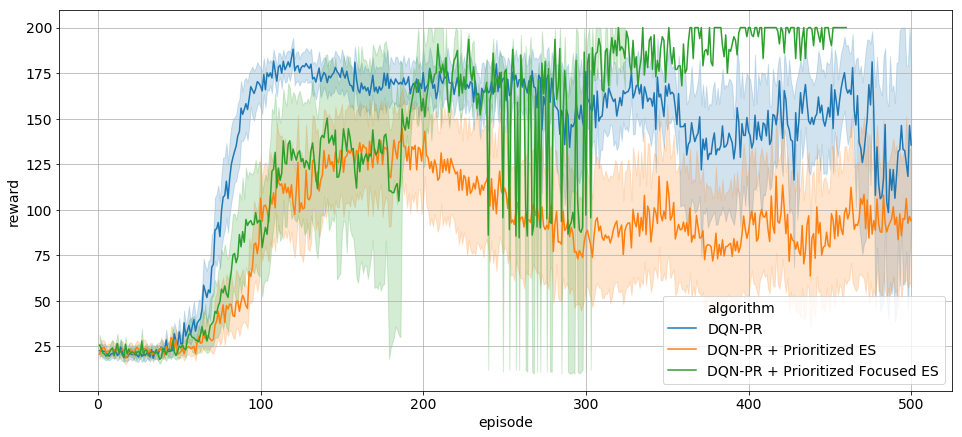

In [104]:
df_plot = df[df['episode'] <= 500] # change later with more data
df_plot = df_plot[df_plot['algorithm'].isin(prio)]

plt.figure(figsize=(16,7))
sns.lineplot(x='episode', y='reward', hue='algorithm', data=df_plot)
plt.savefig('rewards-priodqn.png', dpi=200, bbox_inches='tight')

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


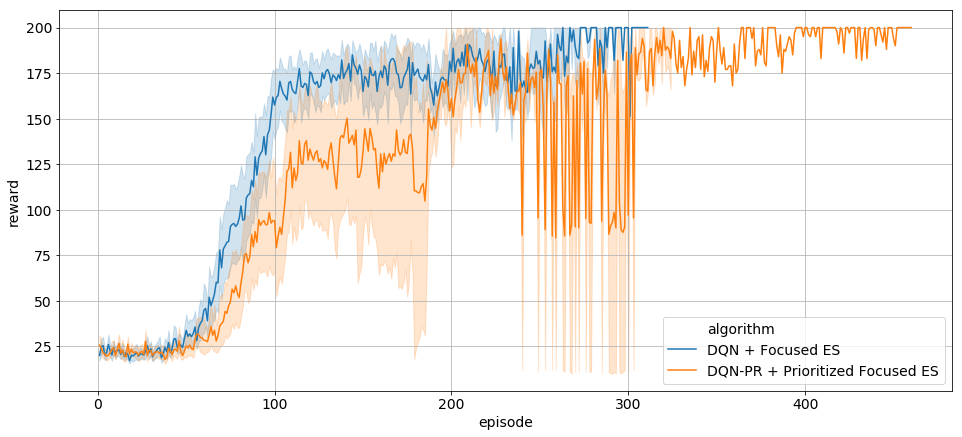

In [105]:
df_plot = df[df['episode'] <= 500] # change later with more data
df_plot = df_plot[df_plot['algorithm'].isin(best)]

plt.figure(figsize=(16,7))
sns.lineplot(x='episode', y='reward', hue='algorithm', data=df_plot)
plt.savefig('rewards-bestdqn.png', dpi=200, bbox_inches='tight')

In [ ]:
# lets see how I can improve this? 


In [ ]:
# if this works out, the I need to take the average
# 
rewards = {k:[] for k in experiments.keys()}
for exp, steps in data.items():
    # iterate through all steps in order
    for step, values in sorted(steps.items(), key=lambda x:x[0]):
        # push them to the rewards list
        rewards[exp].append(np.mean(values))
        
# at the end, they will have variable lengths. nevertheless should be able to plot and analyze

In [ ]:
# what kind of plot? 
# a line plot should do it
# try a simple line plot, see how it works out, then improve on that
sns.lineplot(rewards[exp])
# maybe I can plot even without taking the average
# that would be a bit more powerful so I can plot the deviation bands as well
# just have to organize the data in a dataframe as seaborn expects me to
# do it in long format
# one column is the step
# the other one is the reward
# when I plot, I just say x is the timestep and the reward is on y 
# that should give me the effect I need

In [ ]:
#     df_temp = pd.DataFrame(ea.Scalars(scalar)).drop('wall_time', axis=1).rename(index=str, columns={'value': scalar})
#     if experiments_data[eid] is None:
#         experiments_data[eid] = df_temp
#     else:
#         experiments_data[eid] = pd.merge(experiments_data[eid], df_temp, how='outer', on='step')


In [46]:
# listing all experiments
experiments_data.keys()

dict_keys(['DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-

In [47]:
len(experiments_data.keys())

45

In [59]:
# getting columns from all experiments
sample = list(experiments_data.keys())[1]
experiments_data[sample].columns

Index(['step', 'speed', 'epsilon', 'step_reward', 'loss', 'q_value/min',
       'q_value/max', 'reward_100/avg', 'reward_100/std', 'reward', 'steps'],
      dtype='object')

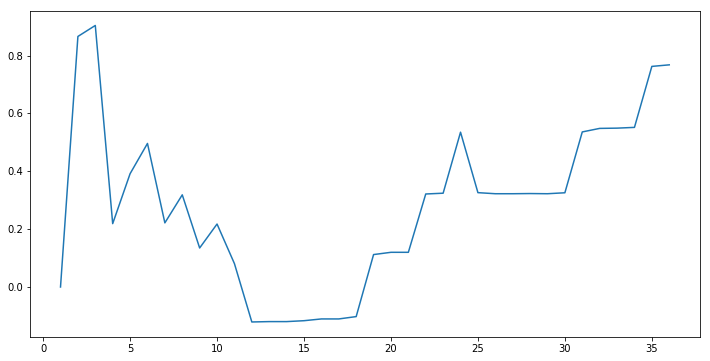

In [60]:
# example comparing rewards from within an experiment
plt.figure(figsize=(12,6))
exp_name = sample
for exp,data in experiments_data.items():
    if exp.startswith(exp_name):
        plt.plot(data['reward_100/avg'], label=exp_name)


In [64]:
experiments_data.keys()

dict_keys(['DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial0', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial1', 'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59-agent1-trial2', 'DQN_Malmo-MinecraftBasic-v0-

In [65]:
len('DQN_Malmo-MinecraftBasic-v0-20181009-140942-22')

46

In [71]:
# they don't all fit the same timeframe
rewards_exp = defaultdict(list)
for key in experiments_data.keys():
    exp_name = key[:46]
    num_episodes = len(experiments_data[key][['reward']].dropna())
    rewards_exp[exp_name].append(num_episodes)

experiment_results = list(zip(rewards_exp.keys(), map(lambda x:np.mean(x), rewards_exp.values())))

df_new = pd.DataFrame(experiment_results, columns=['exp', 'episodes'])
df_new = df_new.set_index('exp')
df_new

,episodes
exp,
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,37.000000
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,24.000000
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,31.333333
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,33.666667
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,27.666667
DQN_Malmo-MinecraftBasic-v0-20181009-164211-76,33.000000
DQN_Malmo-MinecraftBasic-v0-20181009-171924-23,38.000000
DQN_Malmo-MinecraftBasic-v0-20181009-175527-47,49.000000
DQN_Malmo-MinecraftBasic-v0-20181009-185842-63,49.000000


In [78]:
experiments_df.head()

,SEARCH_METHOD,DEFAULT_ENV_NAME,METHOD,NUM_TRIALS,DEBUG,MAX_GAMES_PLAYED,MEAN_REWARD_BOUND,NUMBER_EPISODES_MEAN,NUM_AGENTS,SHARING,...,GRAD_L2_CLIP,SYNC_TARGET_FRAMES,SOFT,SOFT_UPDATE_TAU,EPSILON_DECAY_LAST_FRAME,EPSILON_START,EPSILON_FINAL,INDEPENDENT_EVALUATION,PRINT_INTERVAL,DEVICE
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1,1000,True,0.005,2000,1.0,0.02,False,1,cuda


In [94]:
experiments_df_rev = pd.merge(experiments_df, df_new, left_index=True, right_index=True)

In [96]:
experiments_df_rev.sort_values(by='episodes', ascending=True)

,SEARCH_METHOD,DEFAULT_ENV_NAME,METHOD,NUM_TRIALS,DEBUG,MAX_GAMES_PLAYED,MEAN_REWARD_BOUND,NUMBER_EPISODES_MEAN,NUM_AGENTS,SHARING,...,SYNC_TARGET_FRAMES,SOFT,SOFT_UPDATE_TAU,EPSILON_DECAY_LAST_FRAME,EPSILON_START,EPSILON_FINAL,INDEPENDENT_EVALUATION,PRINT_INTERVAL,DEVICE,episodes
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,24.000000
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,27.666667
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,31.333333
DQN_Malmo-MinecraftBasic-v0-20181009-233508-16,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,3000,1.0,0.02,False,1,cuda,32.000000
DQN_Malmo-MinecraftBasic-v0-20181009-164211-76,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,33.000000
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,33.666667
DQN_Malmo-MinecraftBasic-v0-20181009-225857-00,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,1000,1.0,0.02,False,1,cuda,34.000000
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,37.000000
DQN_Malmo-MinecraftBasic-v0-20181009-171924-23,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,2000,1.0,0.02,False,1,cuda,38.000000
DQN_Malmo-MinecraftBasic-v0-20181010-000755-03,hypothesis,MinecraftBasic-v0,DQN_Malmo,3,True,50,900,10,1,False,...,1000,True,0.0050,5000,1.0,0.02,False,1,cuda,40.000000


In [100]:
experiments_df_rev[['GAMMA', 'BATCH_SIZE', 'REPLAY_SIZE', 'LEARNING_RATE', 'SOFT_UPDATE_TAU', 'EPSILON_DECAY_LAST_FRAME', 'episodes']]

,GAMMA,BATCH_SIZE,REPLAY_SIZE,LEARNING_RATE,SOFT_UPDATE_TAU,EPSILON_DECAY_LAST_FRAME,episodes
DQN_Malmo-MinecraftBasic-v0-20181009-140942-22,0.99,32,10000,0.00010,0.0050,2000,37.000000
DQN_Malmo-MinecraftBasic-v0-20181009-144710-64,0.97,32,10000,0.00010,0.0050,2000,24.000000
DQN_Malmo-MinecraftBasic-v0-20181009-151054-12,1.00,32,10000,0.00010,0.0050,2000,31.333333
DQN_Malmo-MinecraftBasic-v0-20181009-154313-28,0.99,64,10000,0.00010,0.0050,2000,33.666667
DQN_Malmo-MinecraftBasic-v0-20181009-161324-59,0.99,128,10000,0.00010,0.0050,2000,27.666667
DQN_Malmo-MinecraftBasic-v0-20181009-164211-76,0.99,32,50000,0.00010,0.0050,2000,33.000000
DQN_Malmo-MinecraftBasic-v0-20181009-171924-23,0.99,32,100000,0.00010,0.0050,2000,38.000000
DQN_Malmo-MinecraftBasic-v0-20181009-175527-47,0.99,32,10000,0.00100,0.0050,2000,49.000000
DQN_Malmo-MinecraftBasic-v0-20181009-185842-63,0.99,32,10000,0.00500,0.0050,2000,49.000000
DQN_Malmo-MinecraftBasic-v0-20181009-200244-98,0.99,32,10000,0.00001,0.0050,2000,49.000000



- Gamma: Inconclusive. Reducing to 0.97, improves a lot, increasing to 1, increases something
- Batch Size: Increasing to 64 improves to 33, further increasing to 128 to improves to 27
- Replay Size: Inconclusive. Increasing to 50000 improves to 33, but increasing to 100000 moves to 38
- Learning Rate: All other learning rates increase number of episodes to 49 (the max). The average of all trials is 49. It is a werid results since I've tried both smaller and larger values, which suggest the current configuration is a "sweet spot"
- Soft Update Tau: same as above, both smaller and greater soft update tau give worst results. Seems also to suggest something else influencing results, specially since all results at the end seems to be more on the side of worst
- Epsilon Decay Last Frame: Inconclusive. With 2000 as default, reducing to 1000 improves results, as well as increasing to 3000, which gives the best result (32 compared to 37). Yet a too large epsilon decay last frame makes the problem worst.

Which factors I do in fact now?
- Reduce gamma to 0.97. Should I reduce the weight of the final goal? Try it
- Increase batch size to 128, seems to help a lot
- Replay Size increase to 20000, try increasing a little bit instead of a bunch, since it is inconclusive
- Learning Rate: keep the same
- Soft Update Tau: keep the same
- Epsilon Decay: keep the same (at 2000).. Less exploration will also favor my experience sharing approach.


Note: really need a better and more reliable benchmark - what if just screws up at benchmark? 3 trials for benchmark is just very littler

Results are very inconclusive. 3 trials are not enough. What I am seeing as a result is probably due to randomness. To get an accurate result I would need a lot more trials, at least in the benchmark position




In [113]:
# they don't all fit the same timeframe
steps_exp = defaultdict(list)
for key in experiments_data.keys():
    exp_name = key[:46]
    num_episodes = experiments_data[key][['steps']].dropna()
    steps_exp[exp_name].append(num_episodes.iloc[-1])



In [114]:
steps_exp 

defaultdict(list,
            {'DQN_Malmo-MinecraftBasic-v0-20181009-140942-22': [steps    14.0
              Name: 40, dtype: float64, steps    16.0
              Name: 36, dtype: float64, steps    22.0
              Name: 35, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-144710-64': [steps    68.0
              Name: 28, dtype: float64, steps    29.0
              Name: 19, dtype: float64, steps    12.0
              Name: 25, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-151054-12': [steps    5.0
              Name: 36, dtype: float64, steps    9.0
              Name: 39, dtype: float64, steps    21.0
              Name: 19, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-154313-28': [steps    14.0
              Name: 48, dtype: float64, steps    13.0
              Name: 33, dtype: float64, steps    105.0
              Name: 20, dtype: float64],
             'DQN_Malmo-MinecraftBasic-v0-20181009-161324-59': [steps    37

In [ ]:
experiment_results = list(zip(rewards_exp.keys(), map(lambda x:np.mean(x), rewards_exp.values())))

df_new = pd.DataFrame(experiment_results, columns=['exp', 'episodes'])
df_new = df_new.set_index('exp')
df_new

In [123]:
16**4

65536